# <strong>Описание проекта</strong>

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# <strong>Описание данных</strong>

Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.
<strong>market_file.csv</strong>

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

<strong>market_money.csv</strong>

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* Выручка — сумма выручки за период.

<strong>market_time.csv</strong>

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
* минут — значение времени, проведённого на сайте, в минутах.

<strong>money.csv</strong>
    
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    
* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.

In [1]:
!pip install phik 

In [2]:
!pip install -U scikit-learn

In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


#### Импорт библиотек

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import phik
import shap

# загружаем класс pipeline
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score, roc_auc_score)

# классы для перебора признаков
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Для перебора использовать распределение, а не range
#from optuna.integration import OptunaSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

# <strong>Шаг 1. Загрузка данных</strong>
#### 1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:
* /datasets/market_file.csv
* /datasets/market_money.csv
* /datasets/market_time.csv
* /datasets/money.csv
Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.

#### 1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.

Основные задачи:
- Импортировать библиотеки, которые могут понадобится в проекте, в последствии дополнять их
- Загрузить данные
- Посмотреть общую информацию о датафреймах
- Проверить данные на наличие пропусков

In [6]:
market_file = pd.read_csv('/datasets/market_file.csv', decimal='.')
market_file

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [7]:
market_file.head(1)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5


In [8]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Столбцы Маркет_актив_6_месб акционные покупки должен быть целочисленными

In [9]:
market_money = pd.read_csv('/datasets/market_money.csv', decimal='.')

In [10]:
market_money.head(1)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0


In [11]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Значение столбца "Выручка" должен быть числовым типом, а не объектом.

In [12]:
market_time = pd.read_csv('/datasets/market_time.csv')

In [14]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


<strong>Вывод по Загрузке данных.</strong>

* В некоторых фреймах есть столбцы с неверным типом данных внутри.
* Пропусков в столбцах не найдено

# <strong>Шаг 2. Предобработка данных</strong>
Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

Задачи на этап предобработки
- Проверить категориальные переменные на наличие неявных дубликатов
- Устранить явные и неявные дубликат
- Привести столбцы к нужному типу данных

In [15]:
market_file["Покупательская активность"] = market_file["Покупательская активность"].replace({"Прежний уровень":0, "Снизилась":1})

In [16]:
market_file.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [17]:
for col in market_file.columns:
    print(market_file[col].value_counts())

215348    1
216202    1
216220    1
216219    1
216218    1
         ..
215779    1
215778    1
215777    1
215776    1
216647    1
Name: id, Length: 1300, dtype: int64
0    802
1    498
Name: Покупательская активность, dtype: int64
стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64
да     962
нет    338
Name: Разрешить сообщать, dtype: int64
4.1    94
3.9    83
4.4    82
4.0    71
5.5    68
4.3    66
4.9    60
3.5    50
4.6    49
3.3    47
4.2    43
2.4    42
3.8    39
4.7    37
3.4    33
4.8    33
5.1    32
3.6    30
5.7    28
5.8    27
5.3    27
5.2    25
5.6    25
5.4    23
2.6    20
3.0    16
3.1    16
5.0    13
1.7    12
6.3    12
6.1    12
3.7    12
6.6    12
3.2    11
0.9    11
2.7     8
1.5     8
2.9     7
4.5     6
1.4     5
5.9     5
Name: Маркет_актив_6_мес, dtype: int64
4    669
5    323
3    308
Name: Маркет_актив_тек_мес, dtype: int64
627     7
600     7
449     7
503     6
511     6
       ..
525     1
524     1
513     1
510     1
1079  

Тип сервиса содержит значения стандарт и стандартт

In [18]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace("стандартт", "стандарт")

In [19]:
market_file.duplicated().sum()

0

In [20]:
market_file["Маркет_актив_6_мес"] = market_file["Маркет_актив_6_мес"].astype("float")

In [21]:
market_file["Акционные_покупки"] = market_file["Акционные_покупки"].astype("float")

In [22]:
for col in market_money.columns:
    print(market_money[col].value_counts())

215349    3
215756    3
215792    3
215790    3
215788    3
         ..
216211    3
216209    3
216207    3
216205    3
216646    3
Name: id, Length: 1300, dtype: int64
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: Период, dtype: int64
4729.0    8
5051.0    7
4952.0    7
0.0       6
4974.0    6
         ..
4823.5    1
5776.0    1
5001.2    1
4146.6    1
4681.4    1
Name: Выручка, Length: 2776, dtype: int64


Неявных дубликатов в названиях market_money нет

In [23]:
market_money.duplicated().sum()

0

In [24]:
market_money["Выручка"] = market_money["Выручка"].astype("float")

In [25]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [26]:
for col in market_time.columns:
    print(market_time[col].value_counts())

215349    2
215756    2
215792    2
215790    2
215788    2
         ..
216211    2
216209    2
216207    2
216205    2
216646    2
Name: id, Length: 1300, dtype: int64
предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64
14    256
12    237
11    221
13    206
10    204
9     186
15    174
17    163
16    162
18    145
8     141
19    119
20    101
7      88
6      59
21     53
22     40
5      22
23     14
4       9
Name: минут, dtype: int64


In [27]:
market_time.value_counts()

id      Период            минут
215348  предыдцщий_месяц  13       1
216221  предыдцщий_месяц  14       1
216212  предыдцщий_месяц  12       1
        текущий_месяц     17       1
216213  предыдцщий_месяц  15       1
                                  ..
215782  предыдцщий_месяц  12       1
        текущий_месяц     10       1
215783  предыдцщий_месяц  21       1
        текущий_месяц     8        1
216647  текущий_месяц     10       1
Length: 2600, dtype: int64

Найдена ошибка в слове предыдущий в таблице market_time

In [28]:
market_time["Период"] = market_time["Период"].replace("предыдцщий_месяц", "предыдущий_месяц")

In [29]:
market_time.duplicated().sum()

0

Вывод по предобработке:
- Были найдены неявные дубликаты в значениях столбцов, они были заменены на корректные значения
- Дубликаты не найдены

# <strong>Шаг 3. Исследовательский анализ данных</strong>
Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.

Задачи на этап исследовательского анализа данных.

 - Отобрать клиентов с покупательской активностью не менее трех месяцев
 - Исследовательский анализ файла market_file
 - Исследовательский анализ файла market_money
 - Исследовательский анализ файла market_time

In [30]:
def create_hists(df, col):
    plt.subplot(1,2,1)
    plt.suptitle(col)
    
    df[col].plot(kind='hist', bins=20, figsize=(14, 8))
    plt.title('Histplot', fontsize=18)
    plt.xlabel(col, fontsize=14)
    plt.ylabel(None)
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.title('Boxplot', fontsize=18)
    plt.xlabel(col, fontsize=14)
    plt.grid()
    
    plt.show()

In [31]:
def create_bars(df, feature):
    df.groupby(feature)['id'].count().plot(kind='bar', grid=True);
    plt.title(feature)
    plt.xlabel(None)
    plt.show()

##### - Исследовательский анализ файла market_file

In [32]:
market_file.sample(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
249,215597,1,стандарт,нет,4.4,5,868,0.40,Домашний текстиль,2,7,8,5
999,216347,0,премиум,да,5.4,3,491,0.15,Домашний текстиль,2,5,4,11
711,216059,0,премиум,да,4.0,4,861,0.14,Техника для красоты и здоровья,3,4,4,11
1076,216424,0,премиум,да,4.4,4,993,0.17,Домашний текстиль,2,3,9,8
824,216172,0,премиум,да,5.5,4,633,0.18,Товары для детей,3,4,6,12


In [33]:
num_col_mf = market_file.drop(["id","Покупательская активность"], axis=1).select_dtypes(include='number').columns
cat_col_mf = market_file.select_dtypes(exclude='number').columns

In [34]:
num_col_mf

Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [35]:
market_file.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Покупательская активность,1300.0,0.383077,0.486324,0.0,0.00,0.00,1.00,1.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

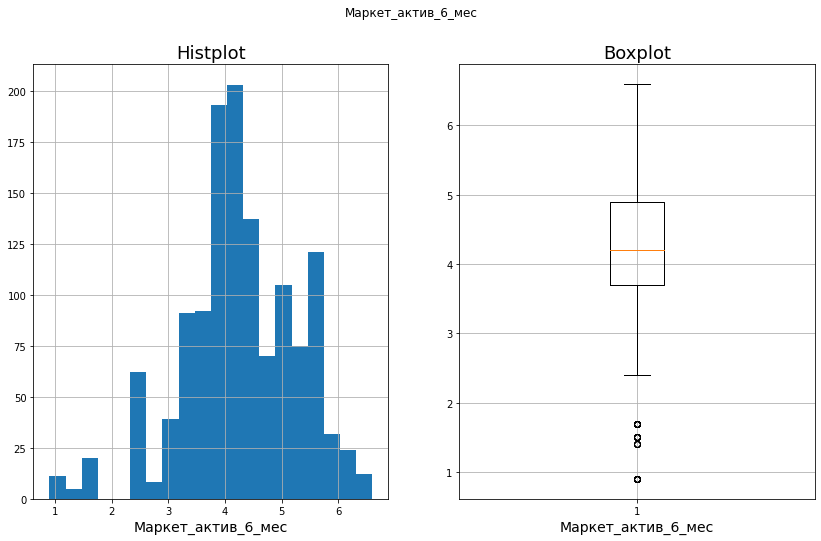

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

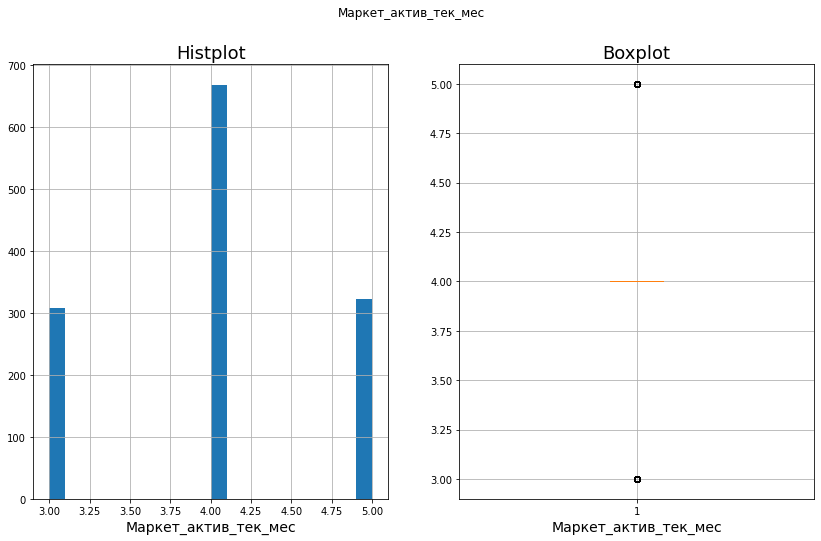

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

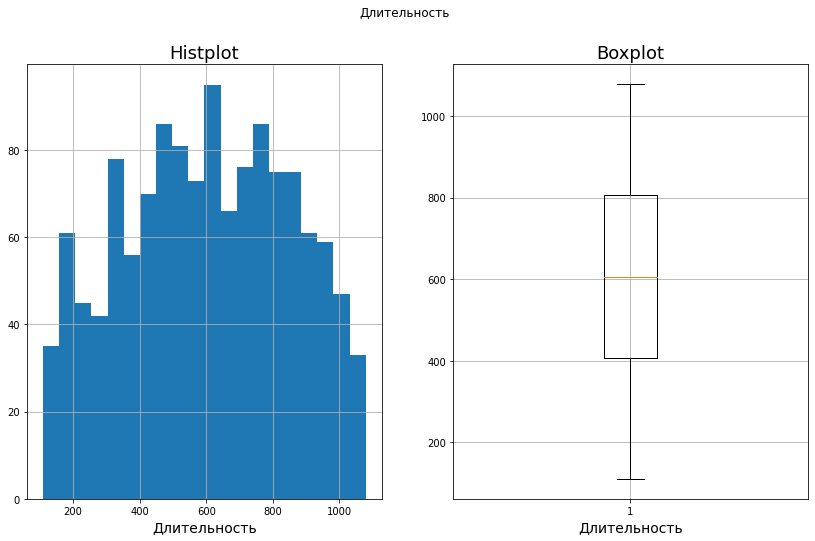

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

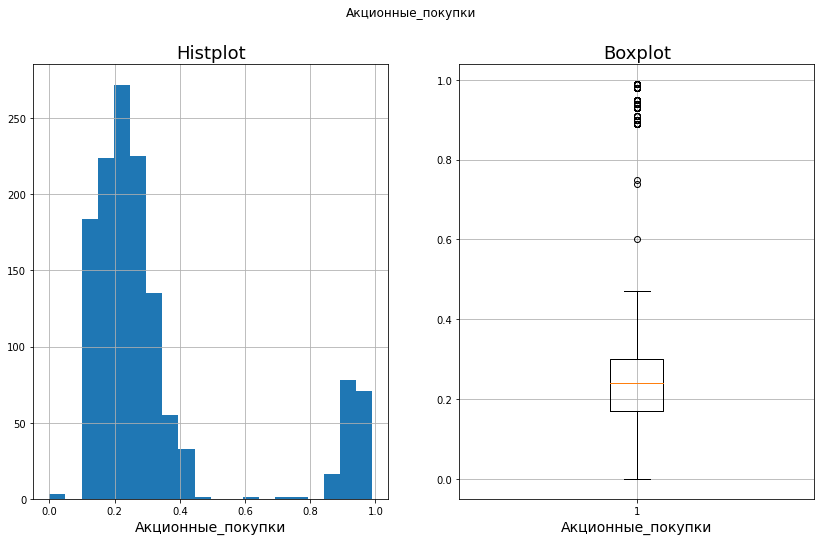

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

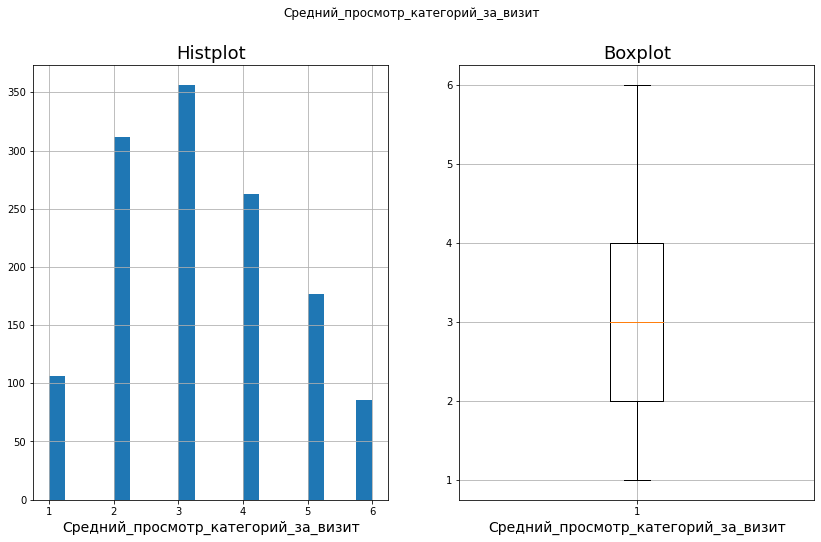

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

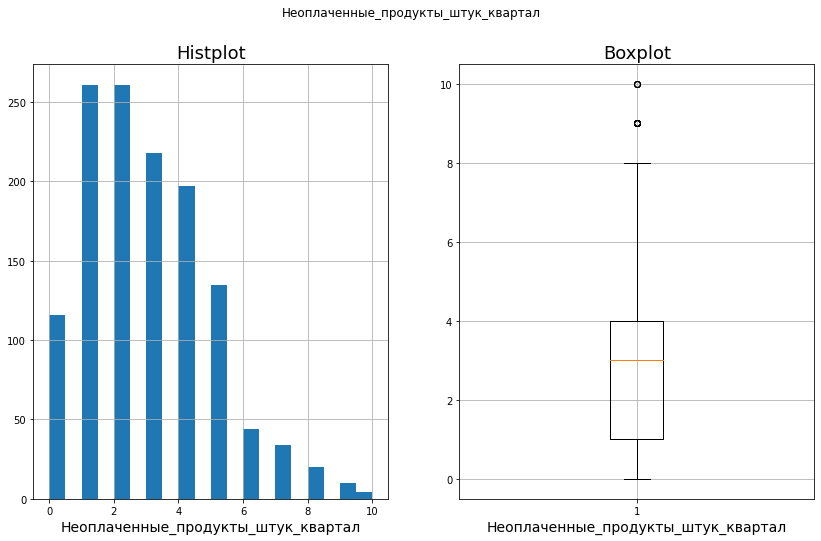

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64

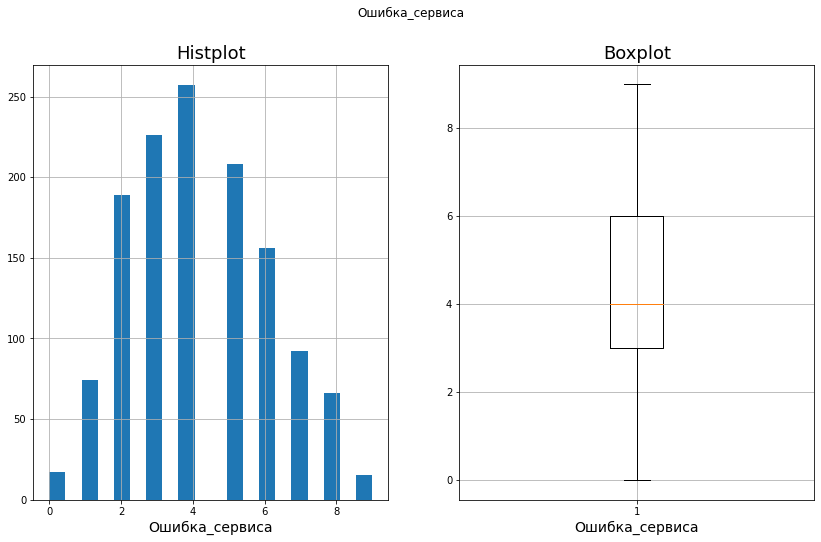

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64

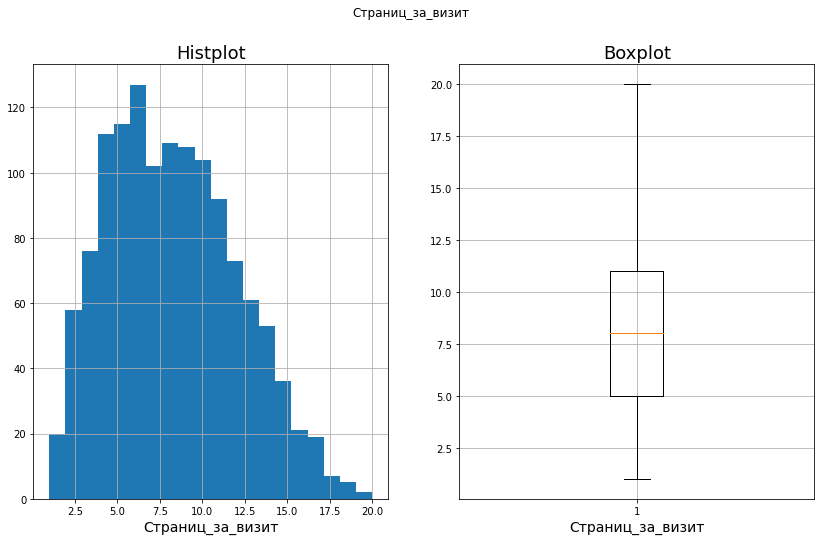

In [36]:
for col in num_col_mf:
    display(market_file[col].describe())
    create_hists(market_file, col)

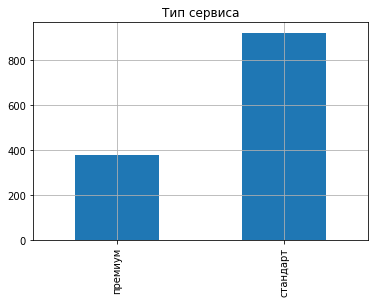

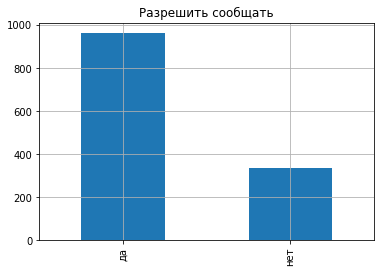

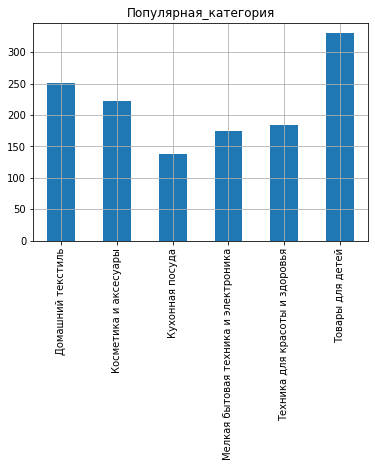

In [37]:
for col in cat_col_mf:
    create_bars(market_file, col)

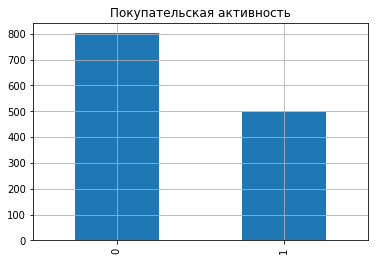

In [38]:
create_bars(market_file, "Покупательская активность")

Заметен дисбаланс классов, возможно стоит сэмплировать данные

Из данных гистограмм видно, что покупательская способность, по всем покупателям, в большинстве своем осталась на прежнем уровне, однако доля покупателей, чья покупательская способность снизилась велика.

Большинство покупателей также разрешили сообщать какие-либо сообщения, также в большинстве с

Есть смысл сравнить покупательскую способность текущего месяца с этим же параметром на за последние 6 месяцев

Графики не оказались информативными...

Решил перечитать значение каждого поля и понял, что маркет_актив_6_мес это не совсем тот показатель, который может помочь посмотреть покупательскую способность за предыдущие месяцы

Если все посчитано правильно, то получается, что средняя покупательская способность снизилась по сравнению за период последних 6 месяцов, прежний уровень же соответственно снизился на целых 0.5

##### - Исследовательский анализ файла market_money

In [39]:
market_money.sample(5)

,id,Период,Выручка
838,215627,предыдущий_месяц,5022.0
318,215454,предыдущий_месяц,5653.0
3887,216643,текущий_месяц,4741.7
2419,216154,текущий_месяц,7082.2
202,215415,текущий_месяц,6352.4


In [40]:
market_money.pivot_table(index='Период', values='Выручка', aggfunc='sum')

,Выручка
Период,
предыдущий_месяц,6417996.5
препредыдущий_месяц,6272769.0
текущий_месяц,6909449.1


Видно, что за текущий меcяц значение выручки превышает значение выручки за предыдущий и за препредыдущий месяцы 

In [41]:
market_money.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


In [42]:
market_money = market_money[(market_money["Выручка"] != 0.0) & (market_money["Выручка"] < 106862)]
market_money

,id,Период,Выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


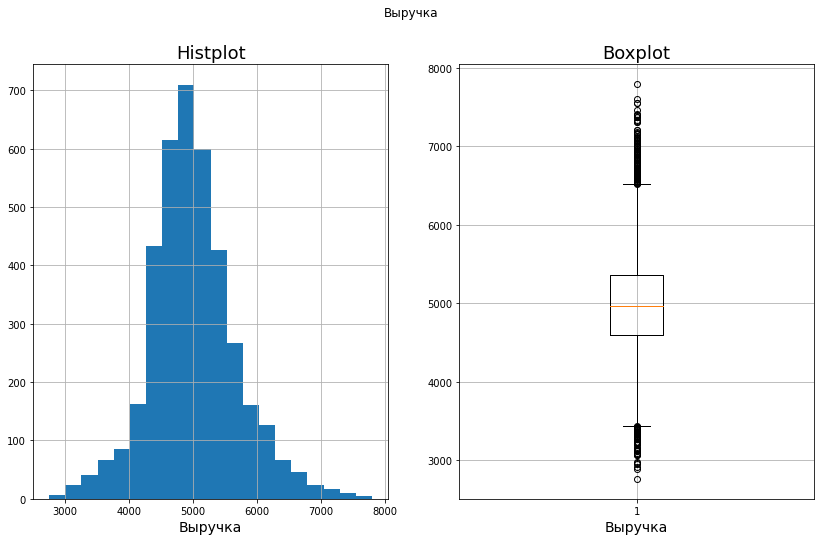

In [43]:
create_hists(market_money, "Выручка")

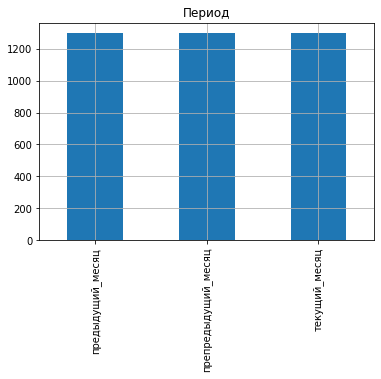

In [44]:
create_bars(market_money, "Период")

##### - Исследовательский анализ файла market_time

In [45]:
market_time.sample(5)

,id,Период,минут
514,215605,текущий_месяц,14
81,215388,текущий_месяц,12
796,215746,текущий_месяц,9
2371,216533,текущий_месяц,20
260,215478,текущий_месяц,14


In [46]:
market_time.pivot_table(index='Период', values='минут', aggfunc='sum')

,минут
Период,
предыдущий_месяц,17508
текущий_месяц,17166


Из таблицы видно, что кол-во минут стало меньше по сравнению с предыдущим месяцем

In [47]:
market_time.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


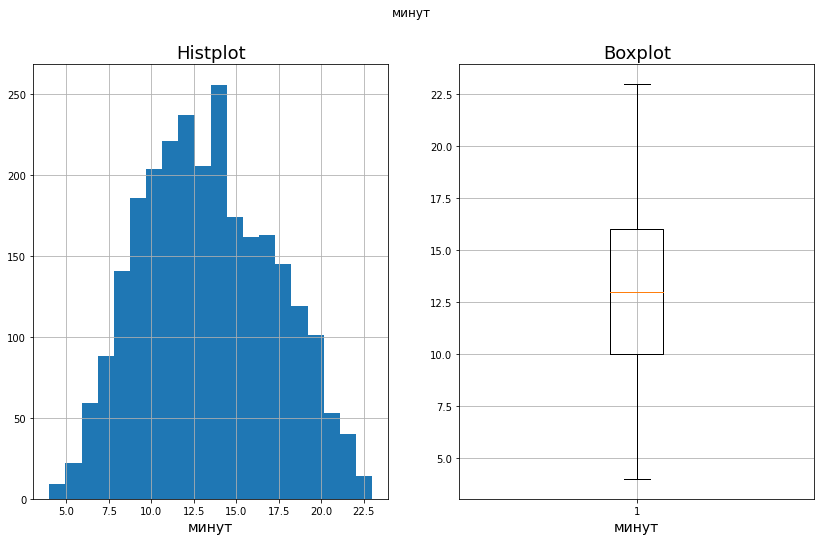

In [48]:
create_hists(market_time, "минут")

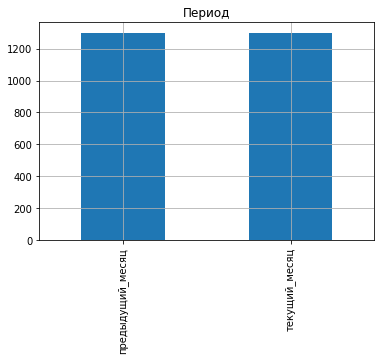

In [49]:
create_bars(market_time, "Период")

<strong>Вывод</strong>

В таблице market_money я удалил строки со значениями равными 0,то есть теперь в таблице будут сохранены пользователи у которых в столбцах выручки за текущий, предыдущий и препредыдущий нет 0.

# <strong>Шаг 4. Объединение таблиц</strong>

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 

4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [50]:
display(market_money.sample(1))
display(market_time.sample(1))

,id,Период,Выручка
7,215350,текущий_месяц,5058.4


,id,Период,минут
1749,216222,текущий_месяц,12


In [51]:
money = market_money.pivot_table(index='id', columns='Период', values='Выручка')
money.head(3)

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4


In [52]:
time = market_time.pivot_table(index='id', columns='Период', values='минут')
time.head(3)

Период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13


In [53]:
f_m = pd.merge(market_file, money, on='id', how='left')
f_m.head(3)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215348,1,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4


In [54]:
df = pd.merge(f_m, time, on='id', how='left')
df.head(3)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215348,1,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13


In [55]:
cols = {
    "предыдущий_месяц_x":"Предыдущий_месяц_прибыль",
    "препредыдущий_месяц":"Препредыдущий_месяц_прибыль",
    "текущий_месяц_x":"Текущий_месяц_прибыль",
    "предыдущий_месяц_y":"Предыдущий_месяц_время",
    "текущий_месяц_y":"Текущий_месяц_время"
}
df = df.rename(columns=cols)
df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Предыдущий_месяц_прибыль,Препредыдущий_месяц_прибыль,Текущий_месяц_прибыль,Предыдущий_месяц_время,Текущий_месяц_время
0,215348,1,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [56]:
df.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Предыдущий_месяц_прибыль               3
Препредыдущий_месяц_прибыль            3
Текущий_месяц_прибыль                  1
Предыдущий_месяц_время                 0
Текущий_месяц_время                    0
dtype: int64

In [57]:
df = df.dropna()

In [58]:
df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Предыдущий_месяц_прибыль,Препредыдущий_месяц_прибыль,Текущий_месяц_прибыль,Предыдущий_месяц_время,Текущий_месяц_время
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<div alert="alert-info">

# <strong>Шаг 5. Корреляционный анализ</strong>

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

<AxesSubplot:>

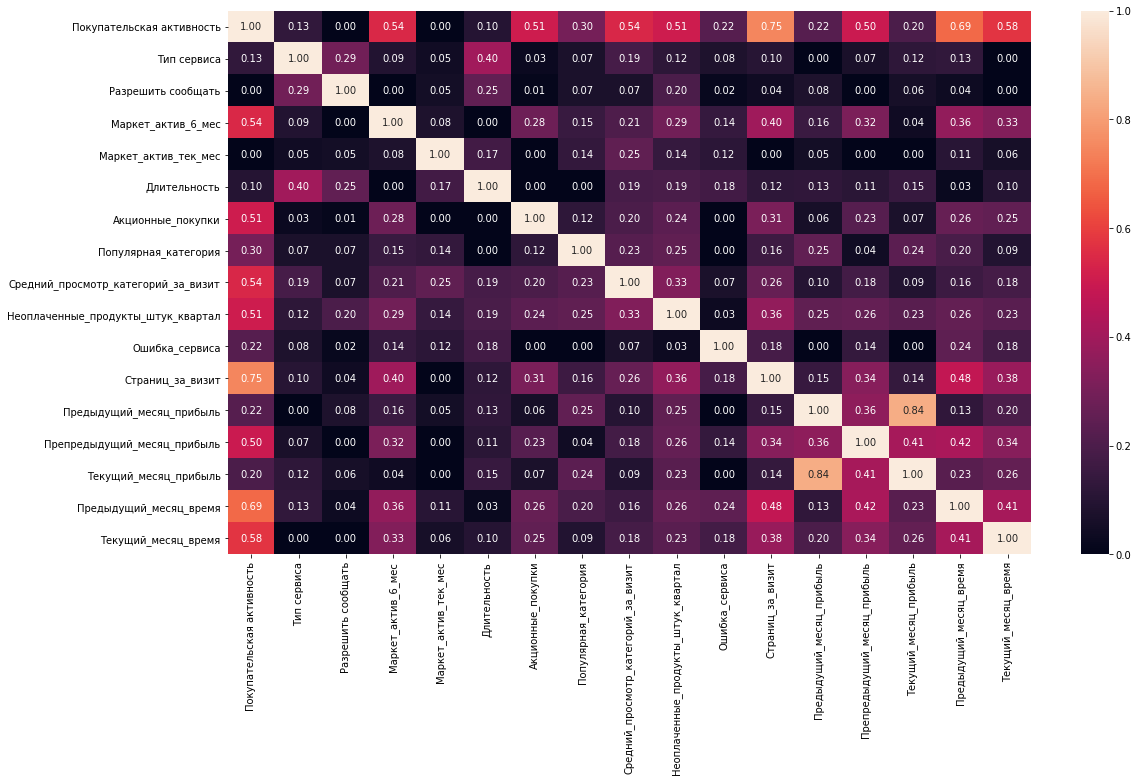

In [59]:
df_corr = df.drop("id", axis=1)
num_cols = df_corr.drop("Покупательская активность", axis=1).select_dtypes(include='number').columns
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_corr.phik_matrix(interval_cols=num_cols), annot=True, fmt=".2f")

Мультиколлиниарности между целевым и входящими признаками я не наблюдаю. Все значения корреляции либо слишком низкие и не имеют никакой линейной связи с целевым. Либо имеют слабую-среднеюю связь.


# <strong>Шаг 6. Использование пайплайнов</strong>

Примените все изученные модели. Для этого используйте пайплайны.

6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [60]:
RS = 42
num_col = df_corr.drop("Покупательская активность", axis=1).select_dtypes(include='number').columns

cat_col_ohe = df.select_dtypes(exclude='number').columns
cat_col_ohe = (df.drop('Тип сервиса', axis=1).select_dtypes(exclude='number').columns).tolist()

In [61]:
num_col

Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Предыдущий_месяц_прибыль',
       'Препредыдущий_месяц_прибыль', 'Текущий_месяц_прибыль',
       'Предыдущий_месяц_время', 'Текущий_месяц_время'],
      dtype='object')

In [62]:
cat_col_ohe

['Разрешить сообщать', 'Популярная_категория']

In [63]:
ord_col = ["Тип сервиса"]

In [64]:
df_corr["Тип сервиса"].value_counts()

стандарт    922
премиум     374
Name: Тип сервиса, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [66]:
X = df_corr.drop(['Покупательская активность'], axis=1)
y = df_corr["Покупательская активность"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RS, stratify=y)

In [67]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

# задаём индексы категориальных признаков
# index = [0,1,6]

# # экземпляр сэмплера, внутри можно задать количество ближайших соседей
# sampler = SMOTENC(categorical_features=index, random_state=42, k_neighbors=5)

# # сэмплируем данные
# # по умолчанию категориальные признаки кодируются методом OneHotEncoding
# X_train_resample, y_train_resample = sampler.fit_resample(X_train, y_train)

In [68]:
smote_pipe = Pipeline(
    [
        (
            'smote',
             SMOTENC(categorical_features=[0,1,6], random_state=42, k_neighbors=5)
        )
    ]
)

ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [69]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)


In [70]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cat_col_ohe),
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col)
    ], 
    remainder='passthrough'
)

In [71]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RS))
])

param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RS)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(probability=True, random_state=RS)],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    {
        'models': [LogisticRegression(
            random_state=RS, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [0.1, 1.0, 10.0, 100.0],
        'preprocessor__num':[StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [72]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring='roc_auc',
    random_state=RS,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Разрешить '
                                                                                'сообщать',
                                                                                'Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(strategy='...
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': [0.1, 1.0, 10.0, 100.0],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [73]:
randomized_search.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [74]:
print('Метрика roc_auc для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Метрика roc_auc для лучшей модели:
 0.8978690392872212

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImpute

In [75]:
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.9167172268737613


<strong>ВЫВОД</strong>

После перебора всех моделей, параметров и гиперпараметов, лучшей моделью оказалось дерево решений, значение roc-auc данной модели 0.84, что кажется весьма высоким результатом.

# <strong>Шаг 7. Анализ важности признаков</strong>

7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP.

7.2 Сделайте выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [76]:
best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=cat_col_ohe)
ord_feature_names = ord_col
num_feature_names = num_cols
all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, 10, random_state=RS)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, 10, random_state=RS)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values = explainer.shap_values(X_test_preprocessed_smpl)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 1], X_test_preprocessed_smpl)
#shap.summary_plot(shap_values[:, 1], X_test_preprocessed_smpl,max_display=20)

  0%|          | 0/10 [00:00<?, ?it/s]

In [77]:
best_model = randomized_search.best_estimator_.named_steps['models']

preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=cat_col_ohe)

In [78]:
ord_feature_names = ord_col
num_feature_names = num_cols

all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

In [79]:
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, 10, random_state=RS)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, 10, random_state=RS)

In [80]:
explainer = shap.KernelExplainer(best_model.predict, X_train_preprocessed_smpl)

In [81]:
shap_values = explainer.shap_values(X_test_preprocessed_smpl)

  0%|          | 0/10 [00:00<?, ?it/s]

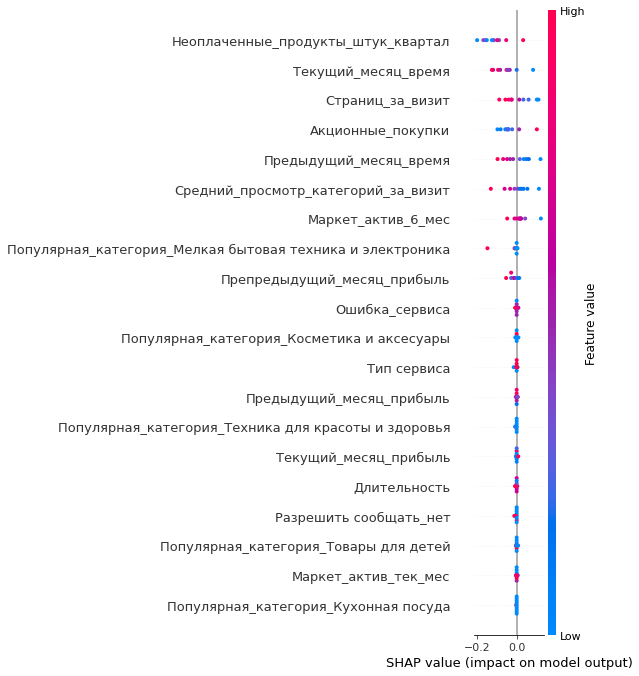

In [82]:
shap.summary_plot(shap_values, X_test_preprocessed_smpl,max_display=20)

In [83]:
shap_values.shape # От этого нам нужен второй столбец в третьем измерении.

(10, 20)

# <strong>Шаг 8. Сегментация покупателей</strong>

8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.

8.3 Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.

In [84]:
market_money.sample(5)

,id,Период,Выручка
3336,216460,предыдущий_месяц,4602.0
2974,216339,текущий_месяц,5782.2
2394,216146,текущий_месяц,5268.4
3313,216452,текущий_месяц,4904.6
862,215635,текущий_месяц,5772.8


In [85]:
porog = 0.8

model = randomized_search.best_estimator_
pred = model.predict_proba(X)[:, 1]
pred_true = np.where(pred > porog, True, False)

In [86]:
def level(row):
    if row <= 13000:
        return "Низкая"
    else:
        return "Высокая"

In [87]:
df["Общая_прибыль_3"] = df["Предыдущий_месяц_прибыль"] + df["Препредыдущий_месяц_прибыль"] + df["Текущий_месяц_прибыль"] # за 3 месяца
df_true = df.drop(["Предыдущий_месяц_прибыль", "Препредыдущий_месяц_прибыль", "Текущий_месяц_прибыль"], axis=1)
df_true["Уровень дохода"] = df_true["Общая_прибыль_3"].apply(level)
df_true["Вероятность снижения"] = pred

In [88]:
money = pd.read_csv("/datasets/money.csv", sep=';', decimal=',')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [89]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [90]:
df_true = pd.merge(df_true, money, on='id')
df_true

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Предыдущий_месяц_время,Текущий_месяц_время,Общая_прибыль_3,Уровень дохода,Вероятность снижения,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,14659.6,Высокая,0.823987,4.16
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,15341.9,Высокая,0.341083,3.13
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,17561.4,Высокая,0.719476,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,16274.0,Высокая,0.922534,4.21
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,15251.0,Высокая,0.595581,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,13109.7,Высокая,0.114416,4.44
1292,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,15381.0,Высокая,0.096278,6.11
1293,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,15633.2,Высокая,0.244254,3.29
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,14872.6,Высокая,0.199689,4.03


In [91]:
df_seg_1 = df_true[(df_true["Уровень дохода"] == "Высокая") & (df_true["Вероятность снижения"] > 0.8)]
df_other = df_true[df_true["Вероятность снижения"] <= 0.8]

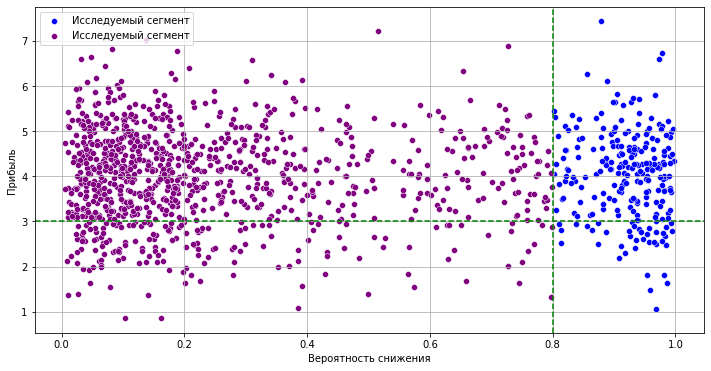

In [97]:
plt.figure(figsize=(12 ,6))
sns.scatterplot(data=df_seg_1, x='Вероятность снижения', y='Прибыль', label='Исследуемый сегмент', color='blue')
sns.scatterplot(data=df_other, x='Вероятность снижения', y='Прибыль', label='Исследуемый сегмент', color='purple')
plt.grid()
plt.axvline(x=0.8, color='green', linestyle='--')
plt.axhline(y=3, color='green', linestyle='--')
plt.legend()
plt.show()

In [93]:
df_seg_1["Популярная_категория"].value_counts()

Товары для детей                        64
Косметика и аксесуары                   60
Домашний текстиль                       54
Кухонная посуда                         40
Мелкая бытовая техника и электроника    12
Техника для красоты и здоровья          10
Name: Популярная_категория, dtype: int64

<AxesSubplot:>

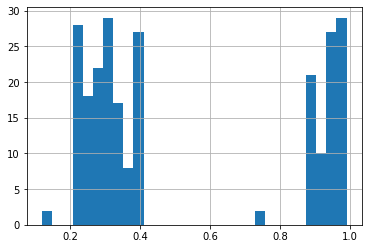

In [94]:
df_seg_1["Акционные_покупки"].hist(bins=30)

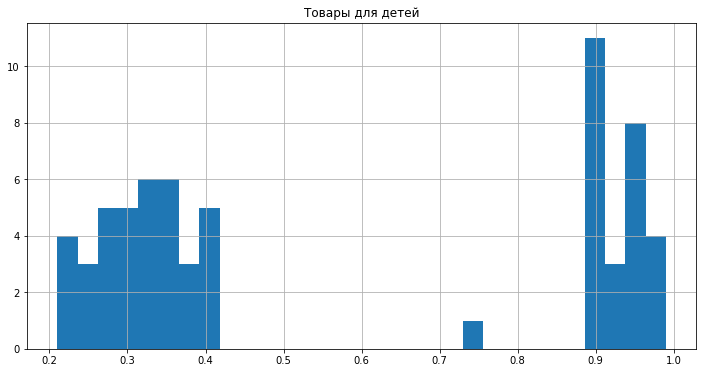

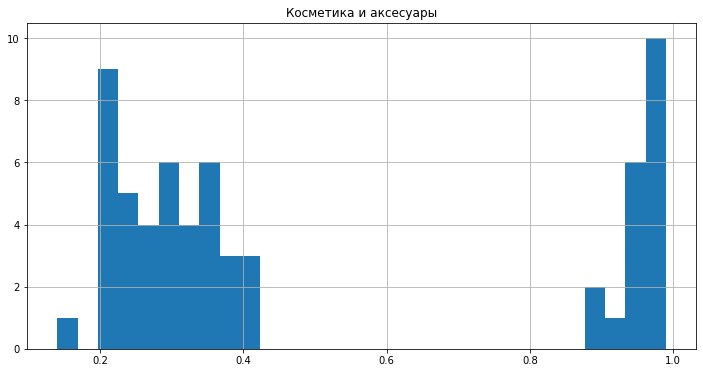

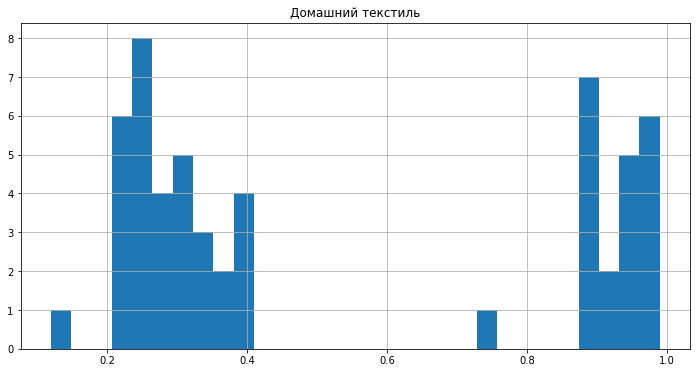

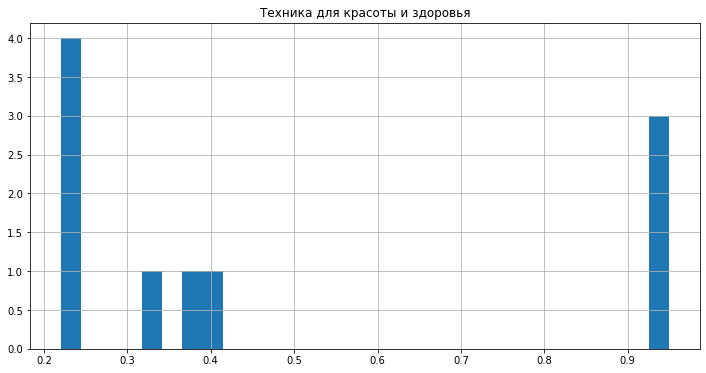

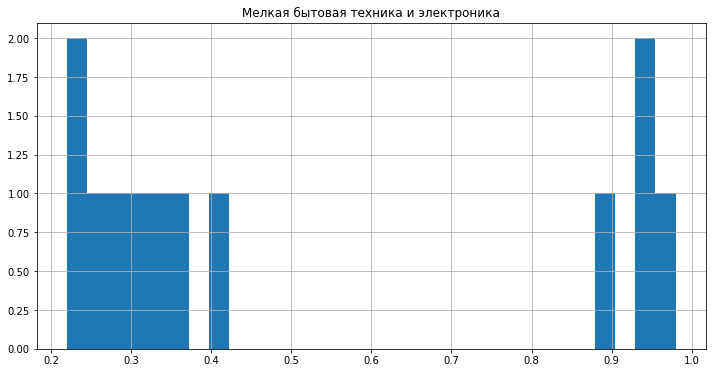

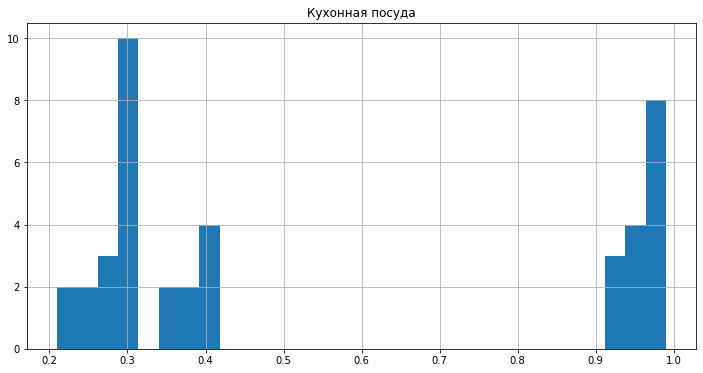

In [95]:
for pop in df_seg_1["Популярная_категория"].unique():
    plt.figure(figsize=(12, 6))
    plt.title(pop)
    df_seg_1[df_seg_1["Популярная_категория"] == pop]["Акционные_покупки"].hist(bins=30)
    plt.show()

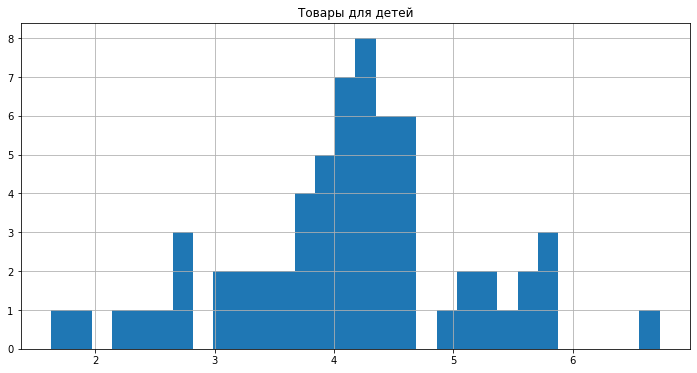

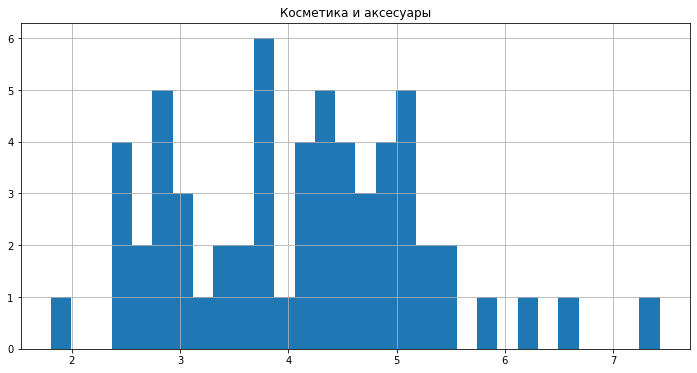

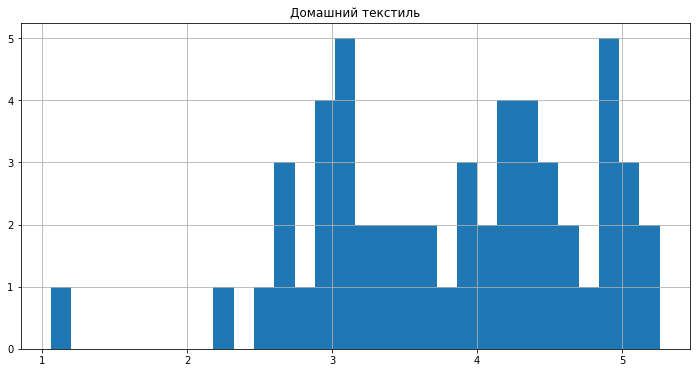

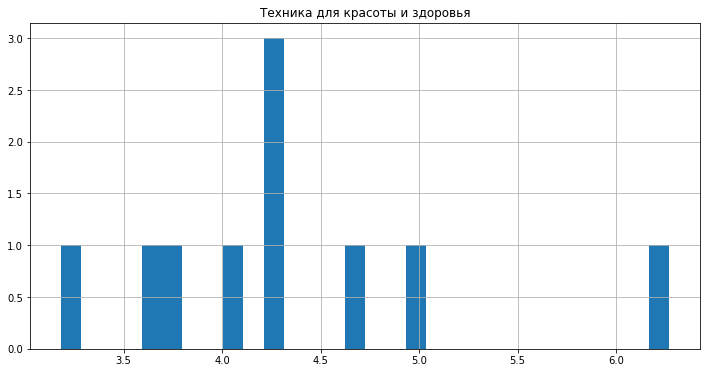

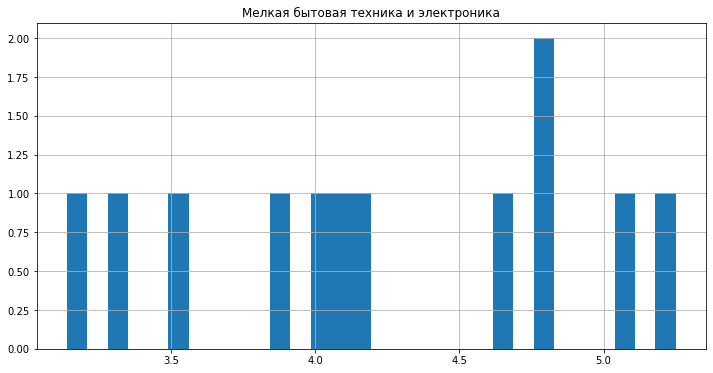

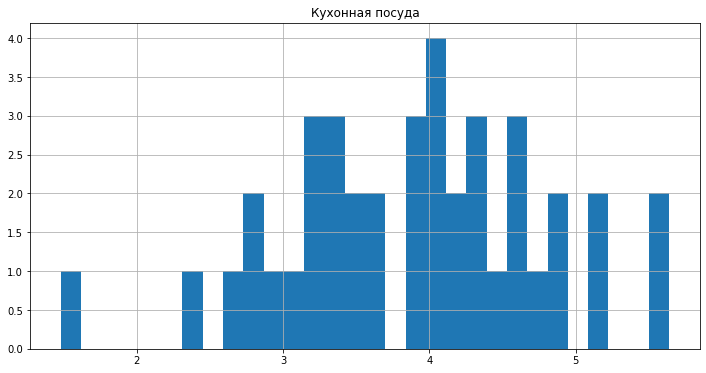

In [96]:
for pop in df_seg_1["Популярная_категория"].unique():
    plt.figure(figsize=(12, 6))
    plt.title(pop)
    df_seg_1[df_seg_1["Популярная_категория"] == pop]["Прибыль"].hist(bins=30)
    plt.show()

Выше построены гистограммы распределения значений акционных покупок, по каждой популряной покупке и значении прибыли по каждой категории.

Видно, что покупатели кухонной посуды и домашнего текстиля приносят намного больше денег.


Исходя из полученных значений стоит предоставить покупателям данных категорий скидки, промокоды на товары, чтобы снова вернуть их на свой "рынок". Возможно покупатели уходят из-за роста цен или напротив находят те же товары дешевле на других платформах.

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>

<font color='blue'>К сожалению, проект не готов. Присылай законченную версию. По всем непонятным моментам можно обращаться за помощью наставникам и преподавателям, а также комьюнити студентов. Буду ждать :)

</font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>

<font color='blue'>К сожалению, проект не готов. Присылай законченную версию. По всем непонятным моментам можно обращаться за помощью наставникам и преподавателям, а также комьюнити студентов. Буду ждать :)

</font>

# <strong>Шаг 9. Общий вывод</strong>
* Сделайте общий вывод:
* опишите задачу;
* опишите исходные данные и проведённую предобработку;
* напишите, что вы сделали для поиска лучшей модели;
* укажите лучшую модель;
* добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'>Иван, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 4</b></font>\
<font color='green'>Иван, большое спасибо за доработку.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь график shap.</font></ul>
<ul><font color='red'>Выдели сегмент по результатам моделирования и данных о <b>прибыльности</b> покупателей.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'>Напоминаю тебе об ограничении итераций ревью (не более шести проверок): у нас осталось еще 2 проверки, надеюсь, что ты справишься. Если у тебя возникают какие-то сложности, рекомендую обратиться за помощью к преподавателю по проектам в треде для получения оперативных консультаций</font>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 5</b></font>\
<font color='green'> Иван, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>